In [ ]:
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# For Model Building
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import joblib

In [ ]:
df = pd.read_csv("Human Stress Factors Dataset.csv")
df.head()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.describe()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,0.600000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,0.490287
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,0.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,1.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,1.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


**Snoring Rate (SD: 19.37), Eye Movement (SD: 11.89), Heart Rate (SD: 9.91), Limb Movement (SD: 4.29), Sleep Hours (SD: 3.05) — all show high variation, indicating irregular sleep patterns, restlessness, or possible health-related disturbances.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Rate      630 non-null    float64
 1   Respiratory Rate  630 non-null    float64
 2   Body Temperature  630 non-null    float64
 3   Limb Movement     630 non-null    float64
 4   Blood Oxygen      630 non-null    float64
 5   Eye Movement      630 non-null    float64
 6   Sleep Hours       630 non-null    float64
 7   Heart Rate        630 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


### There are 9 columns and 630 rows in our dataset

In [ ]:
df.isnull().sum()

,0
Snoring Rate,0
Respiratory Rate,0
Body Temperature,0
Limb Movement,0
Blood Oxygen,0
Eye Movement,0
Sleep Hours,0
Heart Rate,0
Stress Levels,0


###There are no null values in the dataset.




In [ ]:
df.duplicated().sum()

np.int64(0)

###There are no duplicate values in the dataset.

In [ ]:
# Checking Distribution of Target Variable
df['Stress Levels'].value_counts()

,count
Stress Levels,
1,378
0,252


###There are 378 stressed people in the dataset.

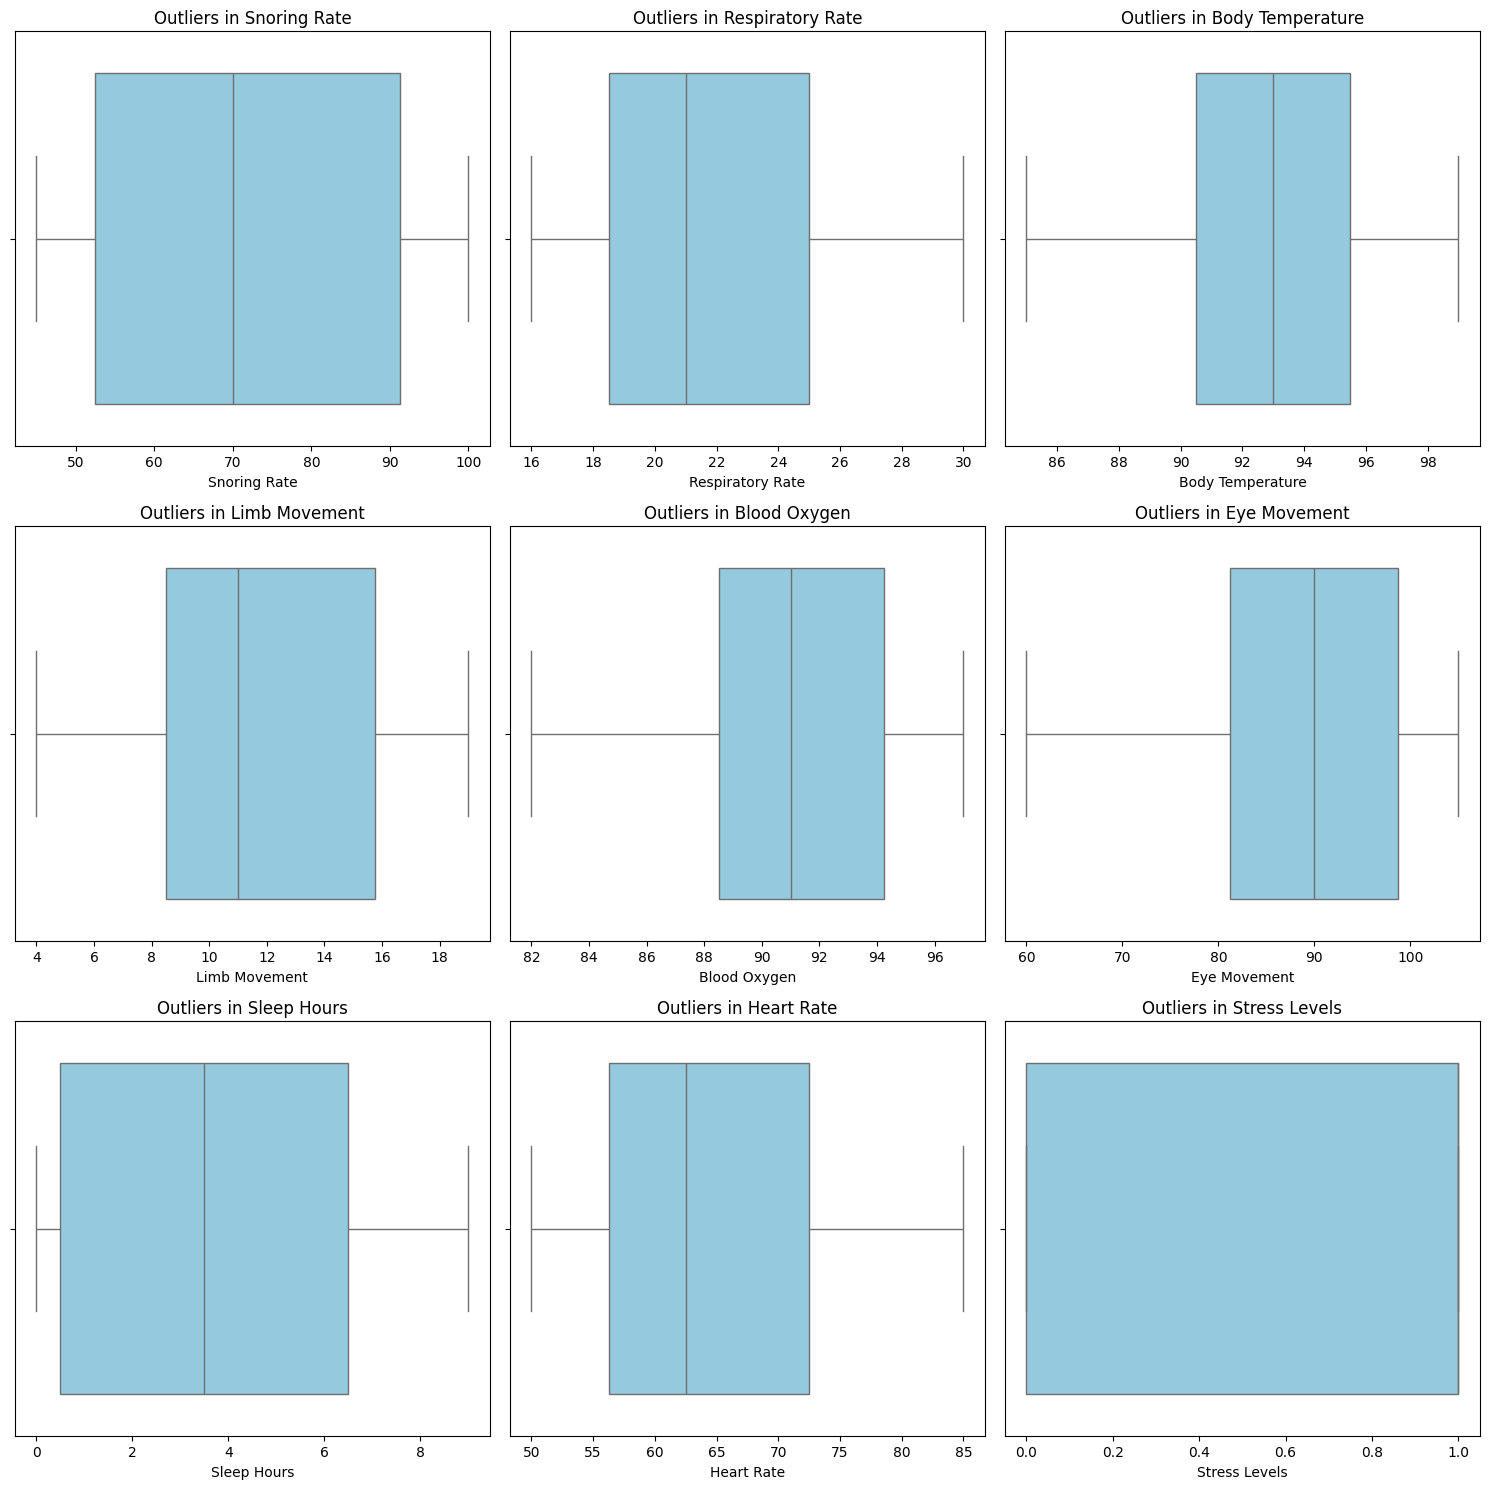

In [ ]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Set number of columns and rows for subplot grid
n_cols = 3  # You can change this (e.g., 2, 4, etc.)
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Set figure size
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Plot each boxplot in a subplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
    plt.tight_layout()

plt.show()

###There are no outliers in the dataset.

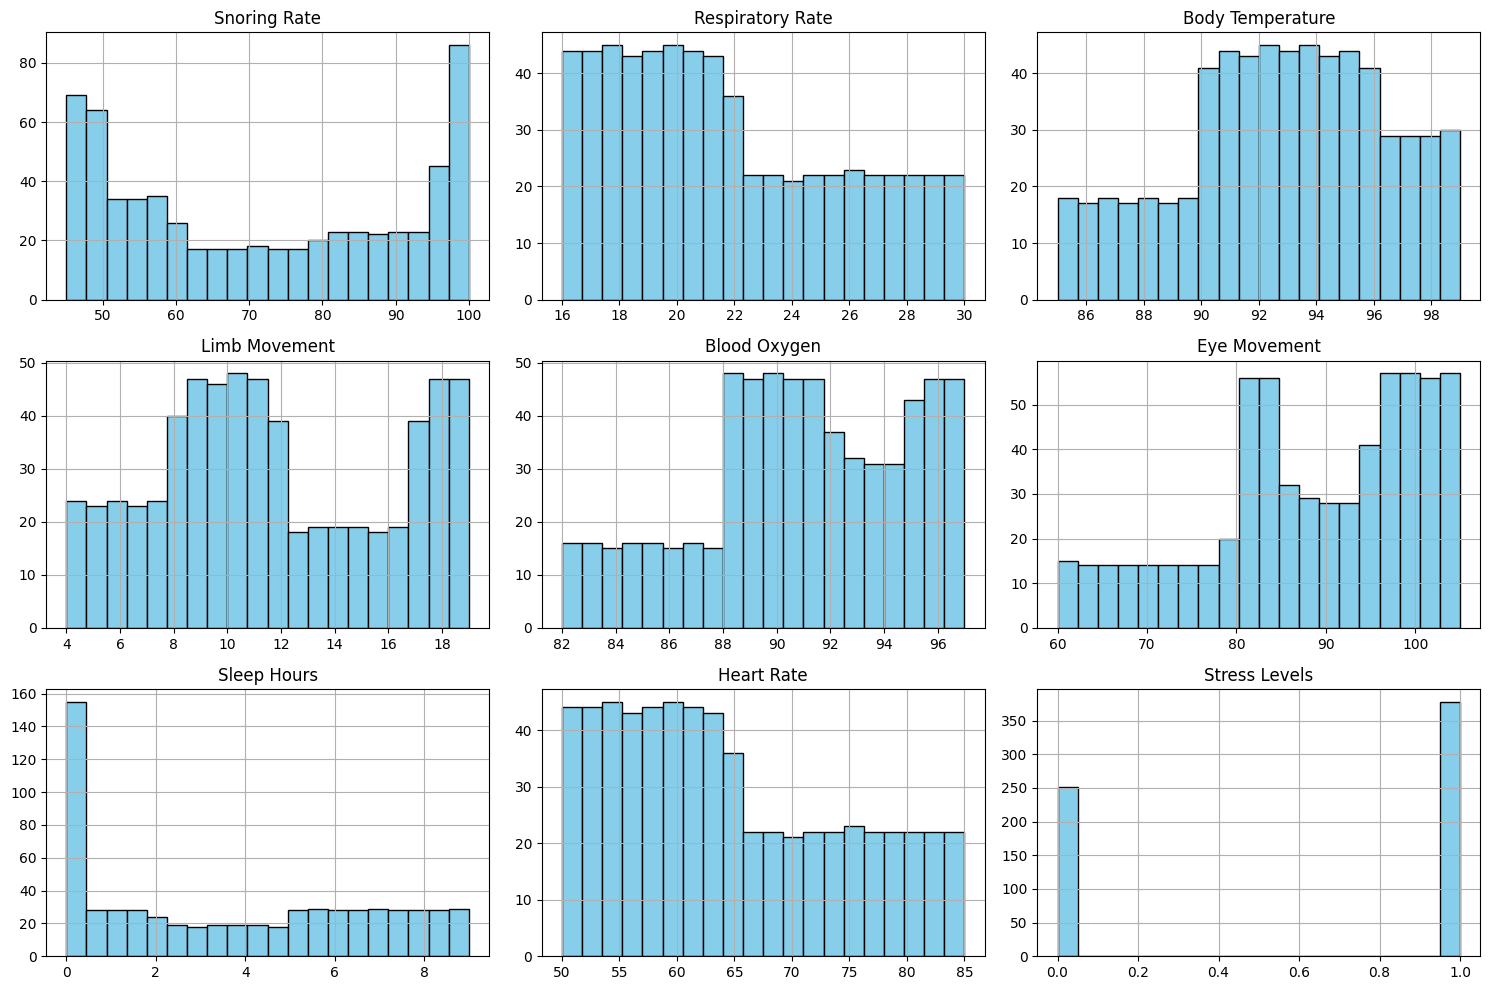

In [ ]:
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

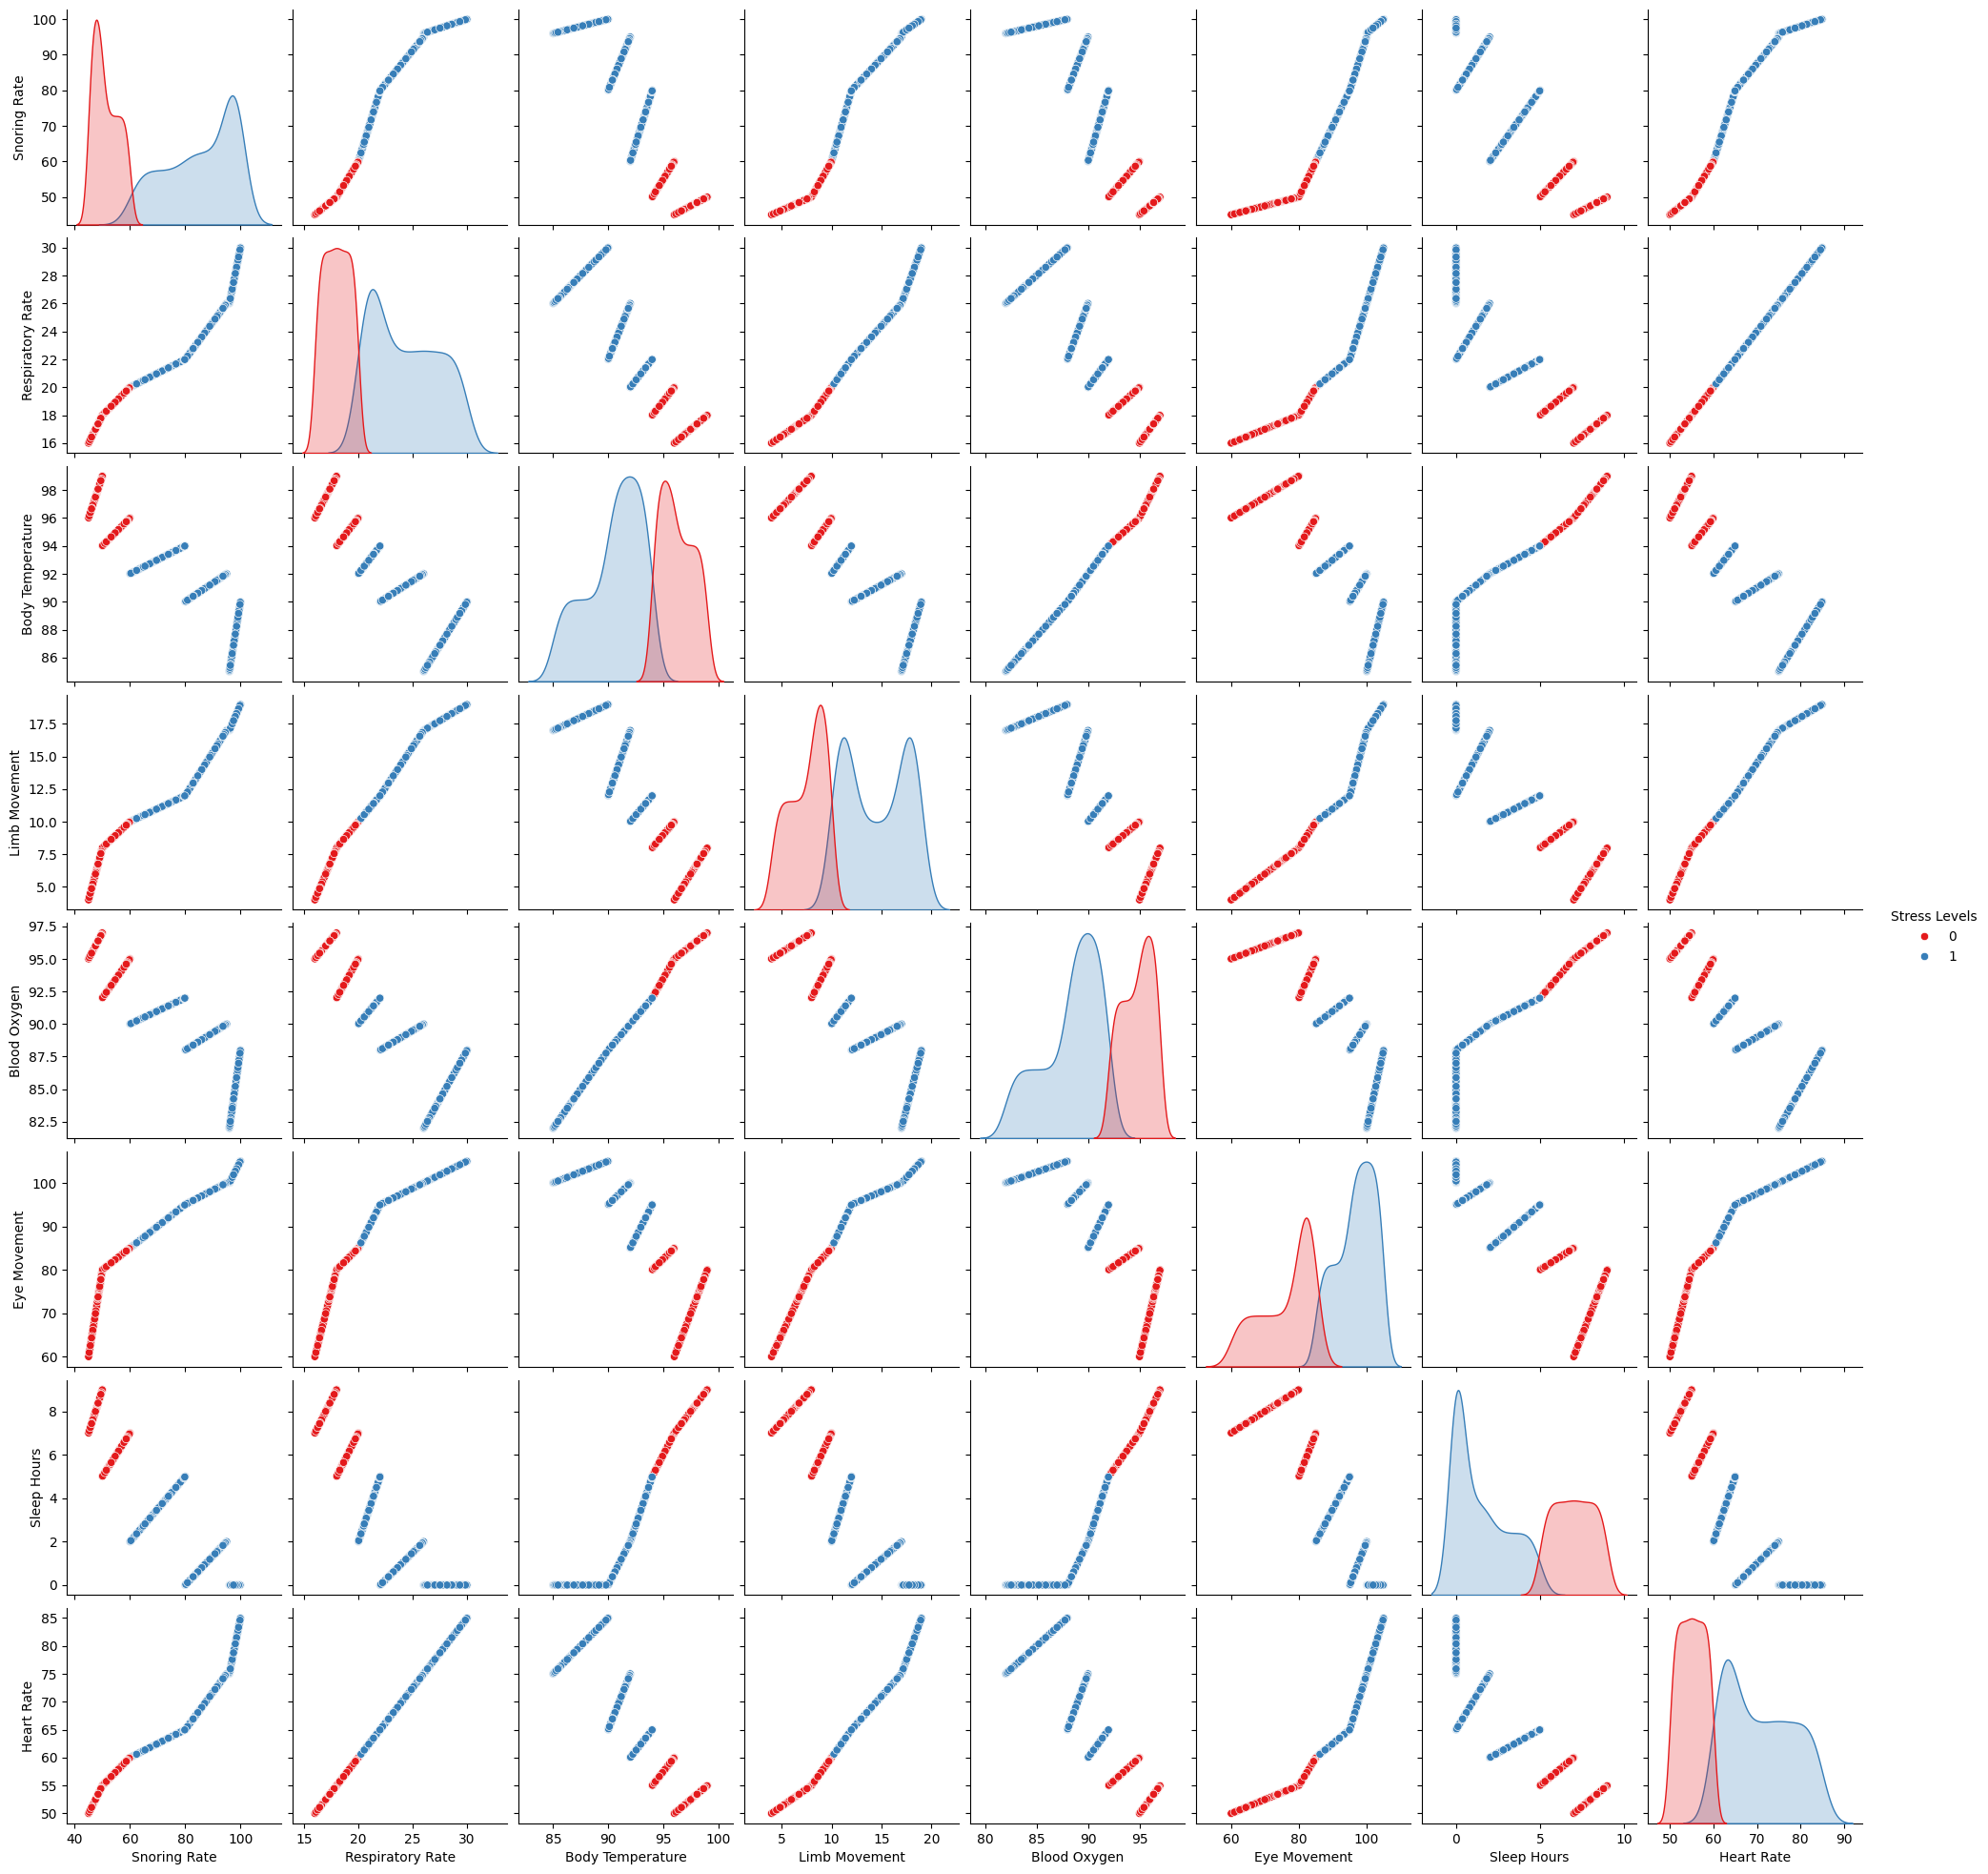

In [ ]:
# Create a pairplot
sns.pairplot(df, hue='Stress Levels', diag_kind='kde', palette='Set1')

# Show the plot
plt.show()

In [ ]:
corr=df.corr()

In [ ]:
corr['Stress Levels']

,Stress Levels
Snoring Rate,0.858362
Respiratory Rate,0.782921
Body Temperature,-0.798697
Limb Movement,0.798211
Blood Oxygen,-0.806156
Eye Movement,0.841621
Sleep Hours,-0.882801
Heart Rate,0.782921
Stress Levels,1.000000


###This show that how the columns are correlated to stress level.

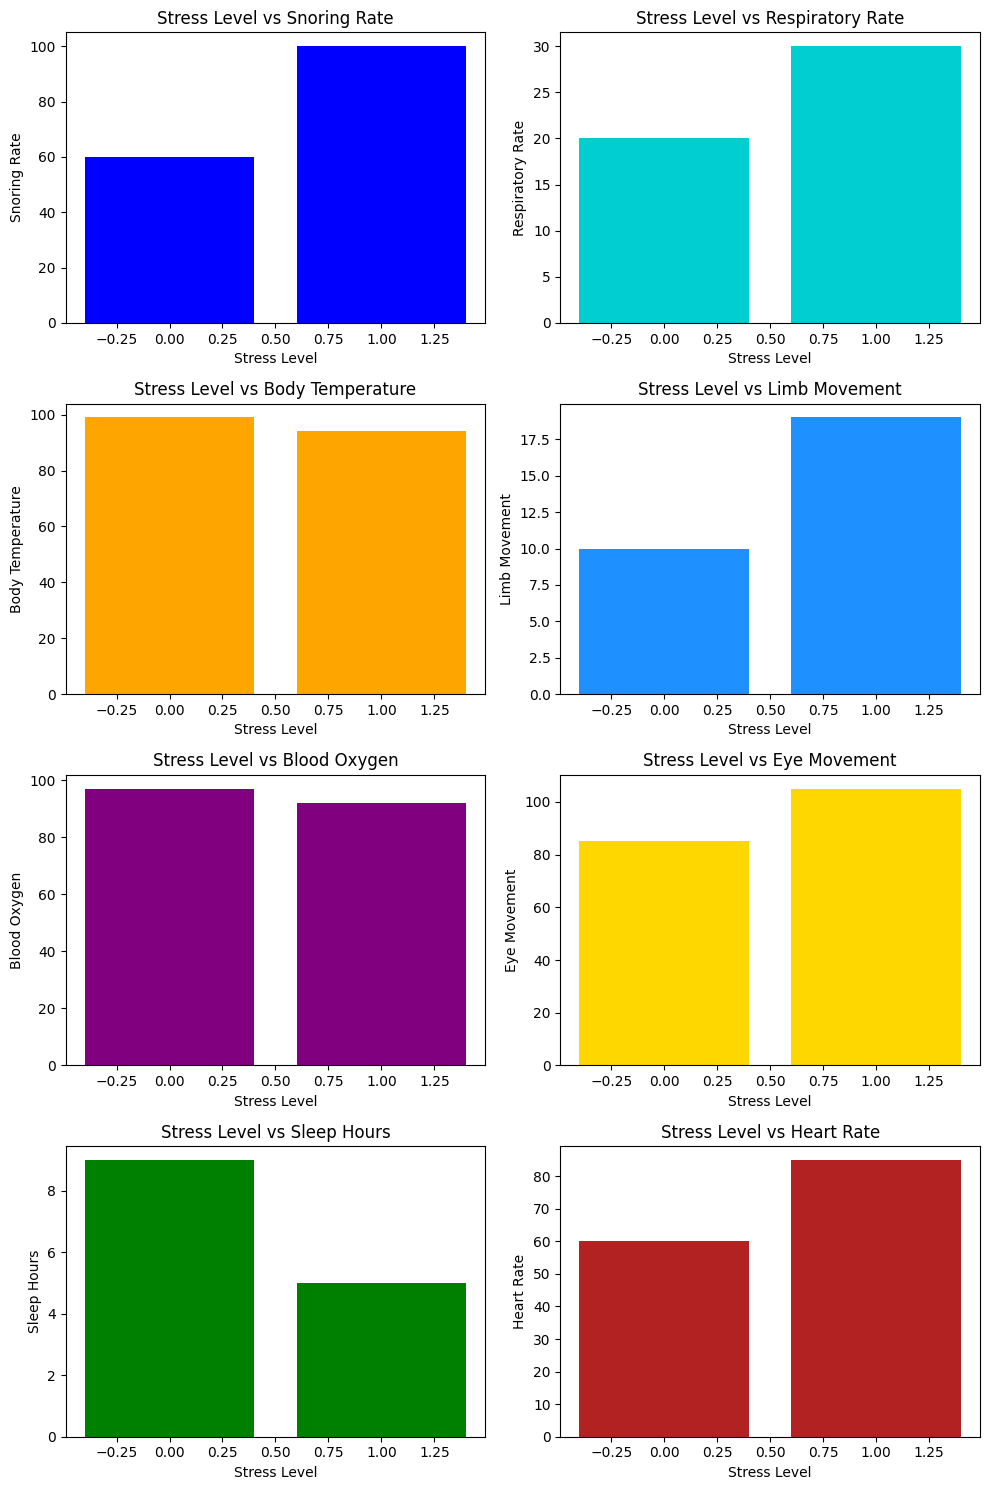

In [ ]:
# Define the columns for plotting
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']
stress_levels = df['Stress Levels']

# Set up the figure and subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a list of colors for each graph
colors = ['blue', 'darkturquoise', 'orange', 'dodgerBlue', 'purple', 'gold', 'green', 'firebrick']

# Plot each column against stress levels
for i, column in enumerate(columns):
    axes[i].bar(stress_levels, df[column], color= colors[i])
    axes[i].set_title('Stress Level vs ' f'{column}')
    axes[i].set_xlabel('Stress Level')
    axes[i].set_ylabel(column)

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

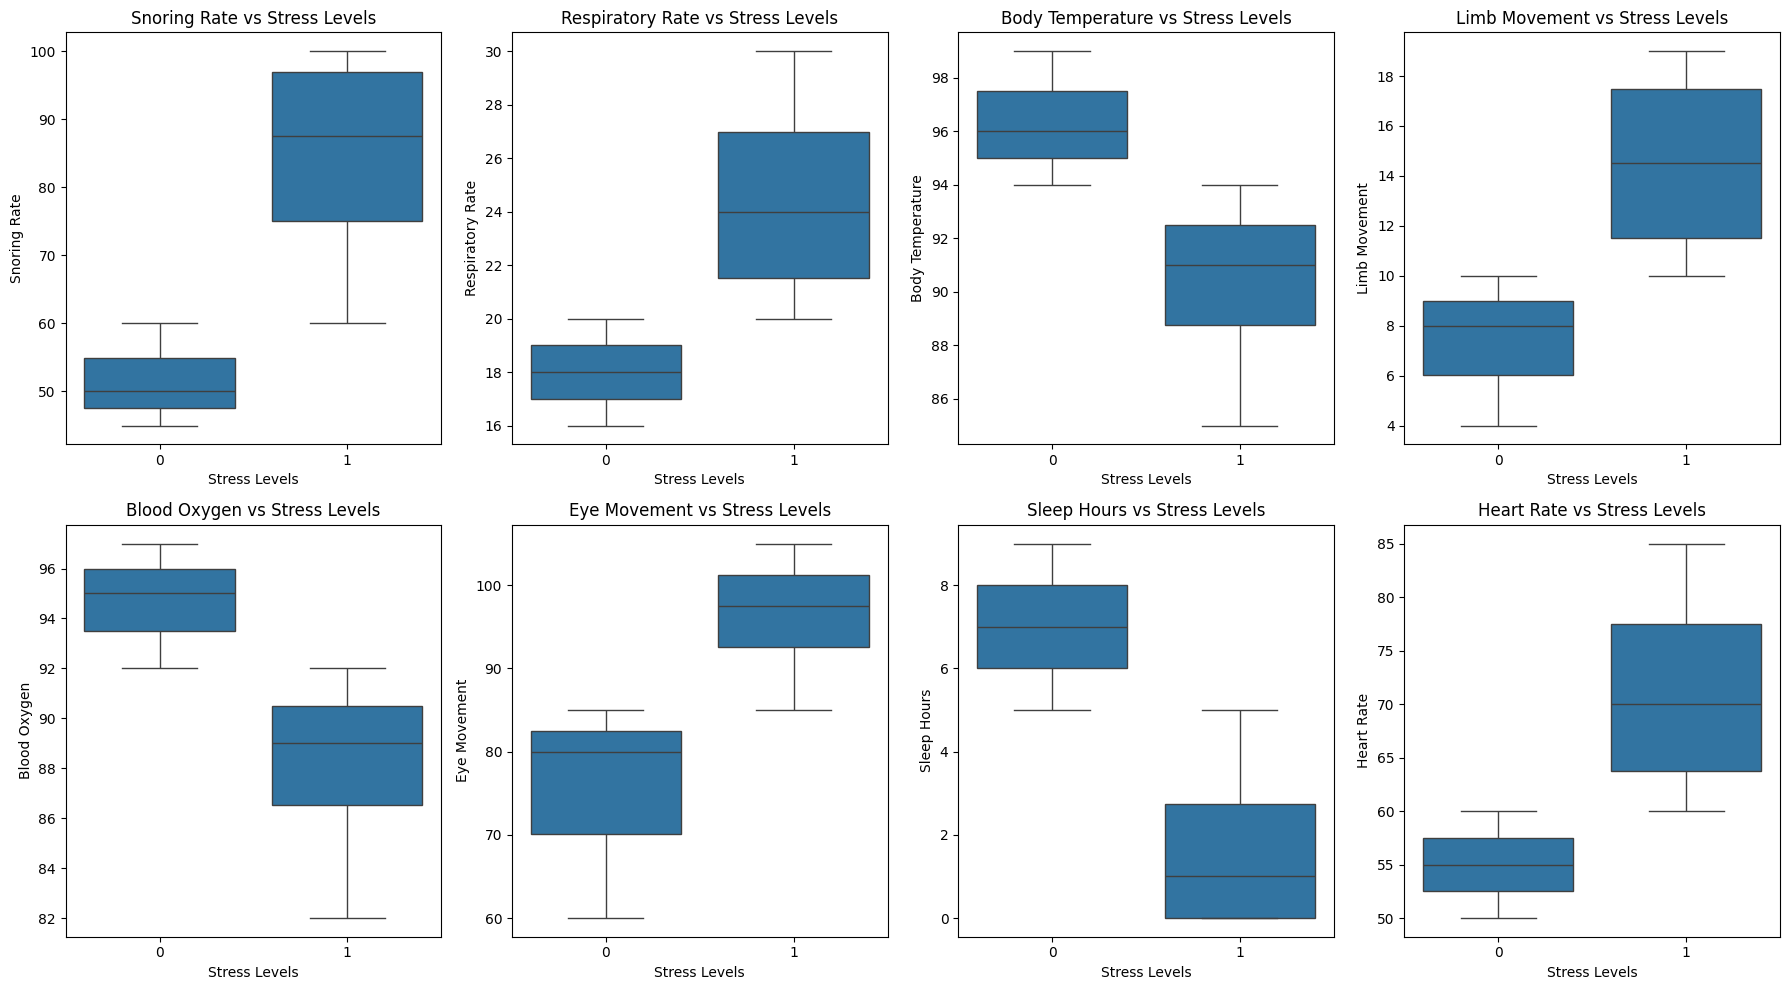

In [ ]:
# Define the columns for which you want to plot boxplots
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']

# Set up a 2x4 grid for boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns

# Loop through each column and plot a boxplot in the respective grid position
for i, column in enumerate(columns):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    sns.boxplot(x='Stress Levels', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs Stress Levels')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# **Splitting the dataset:**


In [ ]:
# Feature columns (X) and target column (y)
X = df.drop(columns=['Stress Levels']) # Drop 'Stress Levels' as it's the target
y = df['Stress Levels'] # Target

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape

((504, 8), (126, 8))

# **Standard Scaling:**


In [ ]:
# Scalling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

X_train_Scaled = pd.DataFrame(X_train_Scaled, columns=X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns=X_test.columns)

joblib.dump(scaler, 'scaler.pkl')

X_train_Scaled.head(5)

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate
0,-1.301633,-1.327488,1.108551,-1.543234,1.164850,-1.942095,1.226503,-1.327488
1,-1.262613,-1.251576,1.238457,-1.403343,1.243043,-1.690246,1.325919,-1.251576
2,-0.927862,-0.776126,0.527390,-0.689163,0.537245,-0.550296,0.640470,-0.776126
3,-0.241931,-0.280699,-0.046933,-0.232677,-0.071841,0.003110,-0.233347,-0.280699
4,-0.599273,-0.456496,0.892040,-0.394656,1.031098,-0.285191,1.059065,-0.456496


In [ ]:
# Checking Mean value(0) and Standard Deviation(1) after Scaling
np.round(X_train_Scaled.describe(), 1)

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate
count,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-1.5,-2.2,-1.8,-2.3,-2.4,-1.2,-1.5
25%,-1.0,-0.8,-0.6,-0.7,-0.6,-0.6,-1.0,-0.8
50%,-0.1,-0.2,0.1,-0.2,0.0,0.1,-0.1,-0.2
75%,1.0,0.8,0.8,1.0,0.9,0.9,0.9,0.8
max,1.5,2.0,1.8,1.7,1.6,1.4,1.7,2.0


#**Check Class Distribution:**


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Training class distribution:", dict(zip(unique, counts)))

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("Test class distribution:", dict(zip(unique_test, counts_test)))


Training class distribution: {np.int64(0): np.int64(205), np.int64(1): np.int64(299)}
Test class distribution: {np.int64(0): np.int64(47), np.int64(1): np.int64(79)}


#**Applying Oversampling Technique:**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new balance
print("Balanced training class distribution:", dict(zip(*np.unique(y_train_balanced, return_counts=True))))


Balanced training class distribution: {np.int64(0): np.int64(299), np.int64(1): np.int64(299)}


#**Model Building:**

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_balanced.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5836 - loss: 16.1134 - val_accuracy: 0.1667 - val_loss: 4.4201
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7758 - loss: 0.7930 - val_accuracy: 0.8167 - val_loss: 0.3131
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9878 - loss: 0.0841 - val_accuracy: 1.0000 - val_loss: 0.0890
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0578
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0431
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0367 - val_accuracy: 1.0000 - val_loss: 0.0466
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0380 - val_accuracy: 1.0000 - val_loss: 0.0355
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 0.0

In [ ]:
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[47  0]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        79

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

ROC AUC Score: 1.0


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_Scaled, y_test)
print(f'Test Accuracy: {test_accuracy*100: .2f}')
print(f'Test Loss: {test_loss*100: .2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0032 
Test Accuracy:  100.00
Test Loss:  0.29


In [ ]:
model.save("Human_Stress_Predictions.h5")

In [ ]:
# Loading the Model and Scaler for Deployment.
from tensorflow.keras.models import load_model
loaded_model = load_model('Human_Stress_Predictions.h5')
loaded_scaler = joblib.load('scaler.pkl')

In [ ]:
# Make Prediction new Unseen Data
new_data = np.array([[20.0, 16.0, 98.0, 3.0, 97.0, 15.0, 7.5, 58.0]]) # Replace With actual new Data
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
print('prediction level: ', prediction)

#Output Prediction in Words.
if prediction > 0.5:
    print("Stressed")

else:
    print("Not Stressed")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
prediction level:  [[1.5606991e-10]]
Not Stressed


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
